# EDA Cine

## 1. Instalar paquetes

In [12]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

## 2. Carga de datos

In [13]:
filename = './tmdb_5000_movies.csv'
filename2 = './tmdb_5000_credits.csv'
movies = pandas.read_csv(filename, header=0)
credit = pandas.read_csv(filename2, header=0)
data = movies.merge(credit, on = 'title')

## 3. Limpieza de base de datos

### 3.1. Descriptivos

In [14]:
print(data.shape)
print(data.head().transpose())



(4809, 23)
                                                                      0  \
budget                                                        237000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                                    http://www.avatarmovie.com/   
id                                                                19995   
keywords              [{"id": 1463, "name": "culture clash"}, {"id":...   
original_language                                                    en   
original_title                                                   Avatar   
overview              In the 22nd century, a paraplegic Marine is di...   
popularity                                                   150.437577   
production_companies  [{"name": "Ingenious Film Partners", "id": 289...   
production_countries  [{"iso_3166_1": "US", "name": "United States o...   
release_date                                                 2009-12-10   
revenue       

In [15]:
print(data.dtypes) 
#print(data["spoken_languages"])
print(data["release_date"])

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object
0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4804    1992-09-04
4805    2011-12-26
4806    2013-10-13
4807    2012-05-03
4808    2005-08-05
Name: release_date, Length: 4809, dtype: 

Los data type concuerdan con el tipo de dato que quieren mostrar

### 3.2. Nulos y Duplicados

In [16]:
print(data.isnull().sum()) #hay nulos
print("La cantidad de duplicados es:" , data.duplicated().sum())  #no hay duplicados

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64
La cantidad de duplicados es: 0


### 3.3. Limpieza de Nulos

In [17]:
dataClean = data
dataClean['homepage'].fillna('null',inplace= True) #ambos son strings no pasa nada si no tienen este campo
dataClean['tagline'].fillna('null',inplace= True) 
dataClean['overview'].fillna('null',inplace= True)
#elimino las filas de los que tienen nulos y no son significativos, en este caso 2 filas de release_date y 1 de runtime
dataClean.dropna(inplace= True)
print(dataClean.isnull().sum())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64


Se puede ver que hay datos nulos, no hay duplicados y los tipos de datos concuerdan con lo que expresa la columna


### 3.4 Conversion de tipo de dato

Convierto las fechas en objetos datetime

In [18]:
dataClean["release_date"] = pandas.to_datetime(dataClean["release_date"]) 

Convierto los objetos que corresponen a listas de diccionarios en listas de diccionarios, porque actualmente se estan leyendo como un string

In [19]:


#Transformo
def transformo(columna):
    transformada=[]
    for i in columna:
        transformada.append(list(eval(i)))
    return transformada

columnasDiccionario = ['genres', 'keywords', 'production_companies' , 'production_countries', 'spoken_languages', 'cast', 'crew']
for d in columnasDiccionario:
    dataClean[d] = transformo(dataClean[d]) 

#obs si lo corres denuevo se rompe pq le entran diccionarios a eval() y no strings

In [10]:
#chequeo
print(dataClean['genres'][0][1]['name'])
print(dataClean['production_companies'][0][1]['name'])

Adventure
Twentieth Century Fox Film Corporation


Funciones para contar objetos

In [ ]:
print(range(dataClean['genres'][0]))

In [29]:
def conjuntoVector(columnaObjetos, nombreString):
    ConjuntoNombreString = []
    for i in columnaObjetos:
        for j in i:
            ConjuntoNombreString.append(j[nombreString])
    return ConjuntoNombreString


In [32]:
def conjuntoUnico(conjuntoVector):
    ConjuntoUnico = []
    for i in conjuntoVector: 
        if i not in ConjuntoUnico: 
            ConjuntoUnico.append(i)
    return ConjuntoUnico 


In [87]:
def contador(conjuntoUnico1, conjuntoVector1):
    ContadorVector1=[]
    for x in conjuntoUnico1:
        contador1 = 0
        for w in conjuntoVector1:
            if w==x:
                contador1 = contador1 +1
        ContadorVector1.append(contador1)   
    return ContadorVector1




In [88]:
def packMatriz(columnaObjetos1, nombreString1):
    x = conjuntoUnico(conjuntoVector(columnaObjetos1 , nombreString1))
    y = contador(conjuntoUnico(conjuntoVector(columnaObjetos1 , nombreString1)), conjuntoVector(columnaObjetos1 , nombreString1) )
    matriz = np.column_stack((x, y))

    return matriz


def xMatriz(packMatriz):
    x = [a[0] for a in packMatriz]
    return x
def yMatriz(packMatriz):
    y = [a[1] for a in packMatriz]
    res = [eval(p) for p in y]
    return res
    

In [90]:
print(conjuntoUnico(conjuntoVector(dataClean['genres'], 'name')))
print(contador(conjuntoUnico(conjuntoVector(dataClean['genres'], 'name')), conjuntoVector(dataClean['genres'], 'name')))

print(packMatriz(dataClean['genres'], 'name'))
print(xMatriz(packMatriz(dataClean['genres'], 'name')))


['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']
[1156, 792, 425, 538, 697, 2299, 1275, 234, 514, 82, 1723, 895, 520, 348, 197, 144, 185, 109, 34, 8]
[['Action' '1156']
 ['Adventure' '792']
 ['Fantasy' '425']
 ['Science Fiction' '538']
 ['Crime' '697']
 ['Drama' '2299']
 ['Thriller' '1275']
 ['Animation' '234']
 ['Family' '514']
 ['Western' '82']
 ['Comedy' '1723']
 ['Romance' '895']
 ['Horror' '520']
 ['Mystery' '348']
 ['History' '197']
 ['War' '144']
 ['Music' '185']
 ['Documentary' '109']
 ['Foreign' '34']
 ['TV Movie' '8']]
['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


## 4. Analisis

El plan es ver que variables influyen en el revenue

### 4.1 Revenue vs Budget 


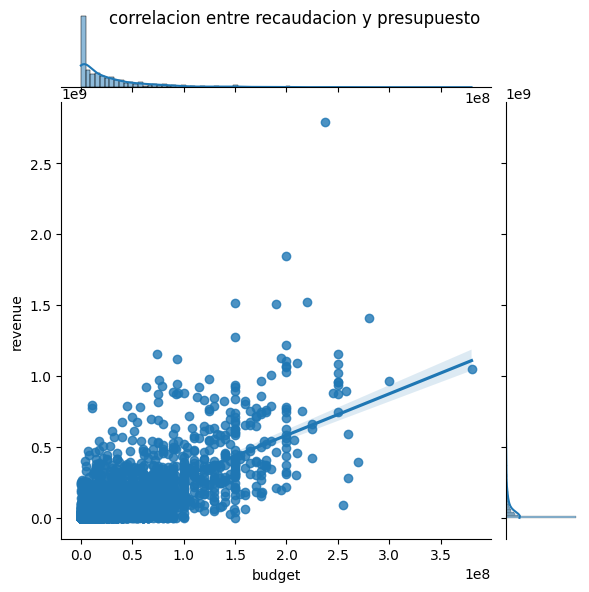

Correlacion entre recaudacion y presupuesto :  0.7305426604658354


C:\Users\faust\AppData\Local\Temp\ipykernel_15224\3428538624.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = dataClean.corr()


In [36]:
fig2 = sns.jointplot(x = "budget", y = "revenue", kind = "reg", data = dataClean)
fig2.fig.suptitle('correlacion entre recaudacion y presupuesto');
plt.show()
#Ver como achicar los puntos (queda desprolijo)
correlacion = dataClean.corr()
print("Correlacion entre recaudacion y presupuesto : ",correlacion.loc['revenue','budget'])

### 4.2 Revenue vs Genres

### 4.3 Revenue vs Popularity

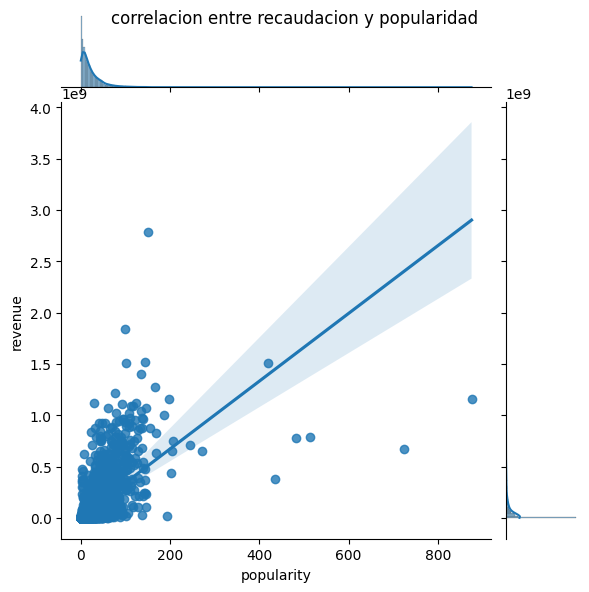

Correlacion entre recaudacion y popularidad :  0.6446546287006752


C:\Users\faust\AppData\Local\Temp\ipykernel_15224\2995783276.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = dataClean.corr()


In [30]:
fig1 = sns.jointplot(x = "popularity", y = "revenue", kind = "reg", data = dataClean)
fig1.fig.suptitle('correlacion entre recaudacion y popularidad');
plt.show()

correlacion = dataClean.corr()
print("Correlacion entre recaudacion y popularidad : ",correlacion.loc['revenue','popularity'])



### 4.4 Revenue vs Production Companies

### 4.5 Revenue vs Production Countries

### 4.6 Revenue vs Runtime

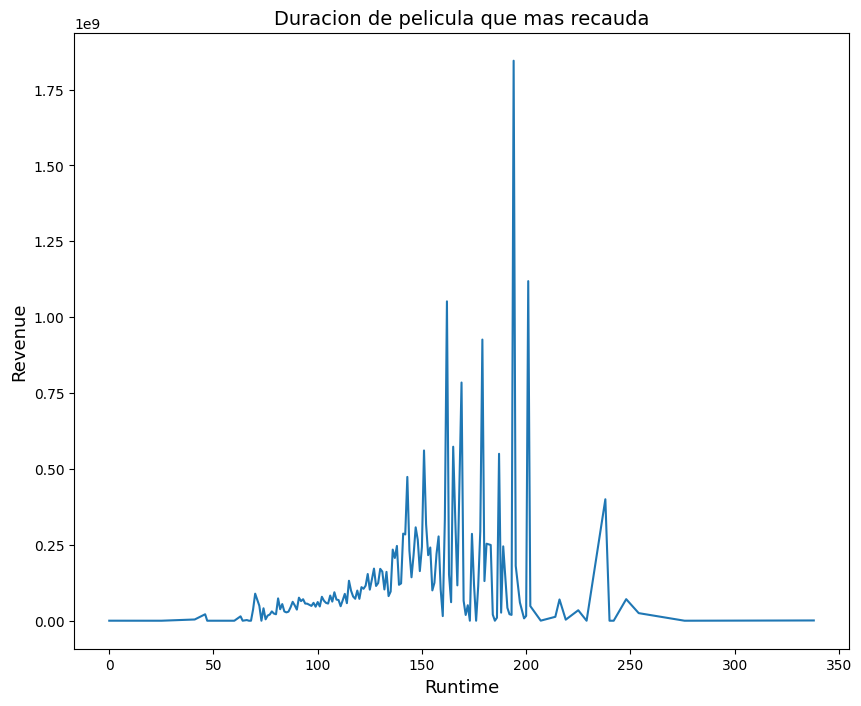

Duracion de pelicula que mas recauda: 194.0 minutos.


In [25]:
run_rev=dataClean.groupby('runtime')['revenue'].mean()
run_rev.plot(figsize = (10,8))
#title            
plt.title("Duracion de pelicula que mas recauda",fontsize=14)            
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)
#max_value
max_run= run_rev.idxmax()

plt.show()

print('Duracion de pelicula que mas recauda:', max_run, 'minutos.')

### 4.7 Revenue vs Vote_average

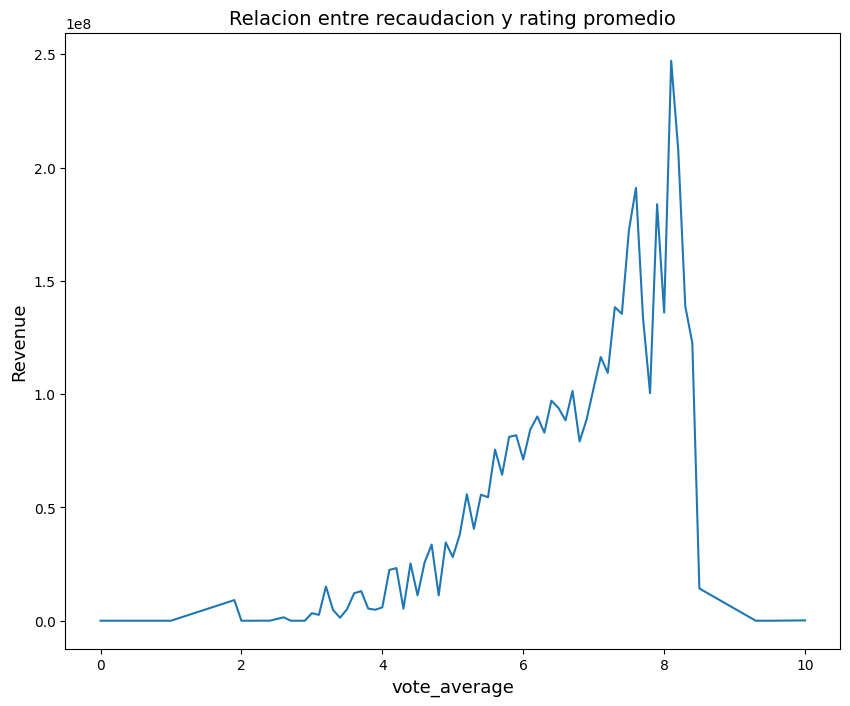

In [27]:
vot_rev=dataClean.groupby('vote_average')['revenue'].mean()
vot_rev.plot(figsize = (10,8))
#title            
plt.title("Relacion entre recaudacion y rating promedio",fontsize=14)            
plt.xlabel('vote_average',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)
#max_value
max_run= vot_rev.idxmax()

plt.show()

### Duracion con mas popularidad

<AxesSubplot: xlabel='runtime'>

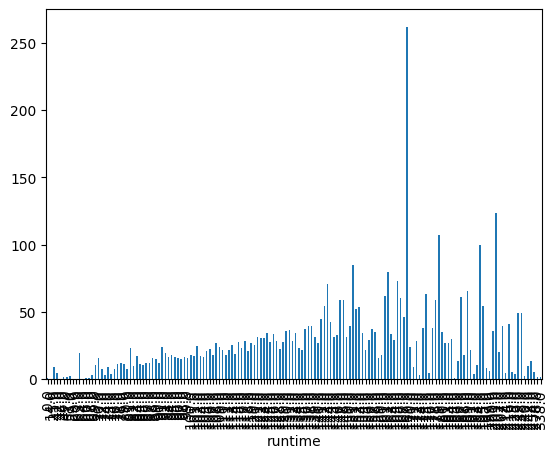

In [41]:
run_pop = dataClean.groupby("runtime")['popularity'].mean()

run_pop.plot(x='runtime', kind='bar')

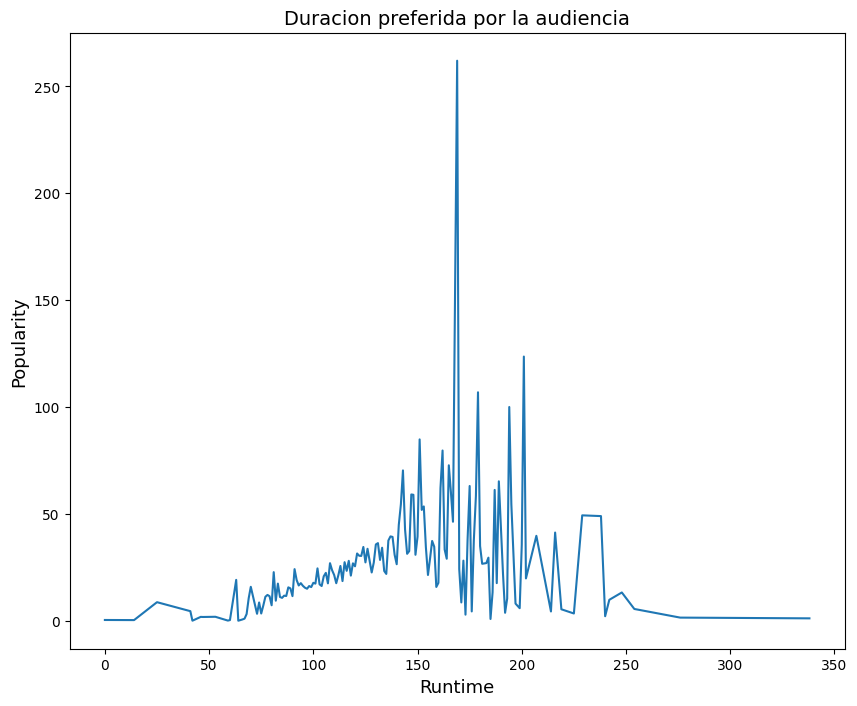

Duracion preferida por la audiencia 169.0 minutos.


In [11]:
run_pop=dataClean.groupby('runtime')['popularity'].mean()
run_pop.plot(figsize = (10,8))
#title            
plt.title("Duracion preferida por la audiencia",fontsize=14)            
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Popularity',fontsize = 13)
#max_value
max_run= run_pop.idxmax()

plt.show()

print('Duracion preferida por la audiencia', max_run, 'minutos.')

### Correlacion entre popularidad recaudacion  

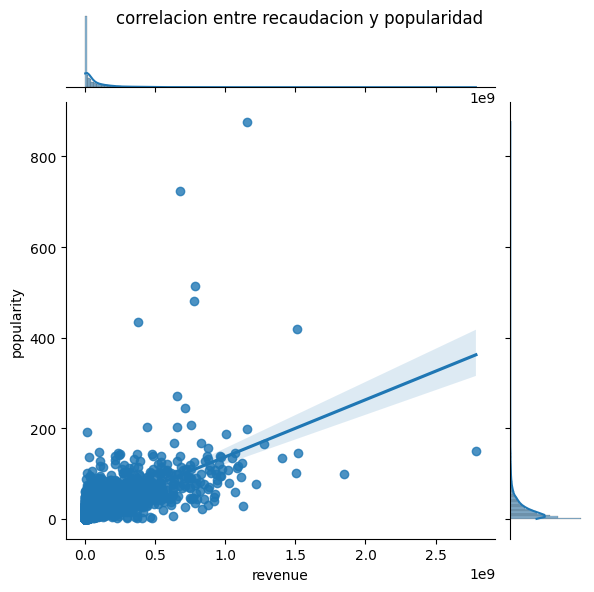

Correlacion entre recaudacion y popularidad :  0.6446546287006752


C:\Users\faust\AppData\Local\Temp\ipykernel_28572\3334859337.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = dataClean.corr()


In [12]:
fig1 = sns.jointplot(x = "revenue", y = "popularity", kind = "reg", data = dataClean)
fig1.fig.suptitle('correlacion entre recaudacion y popularidad');
plt.show()

correlacion = dataClean.corr()
print("Correlacion entre recaudacion y popularidad : ",correlacion.loc['revenue','popularity'])

### Correlacion entre presupeusto y recaudacion

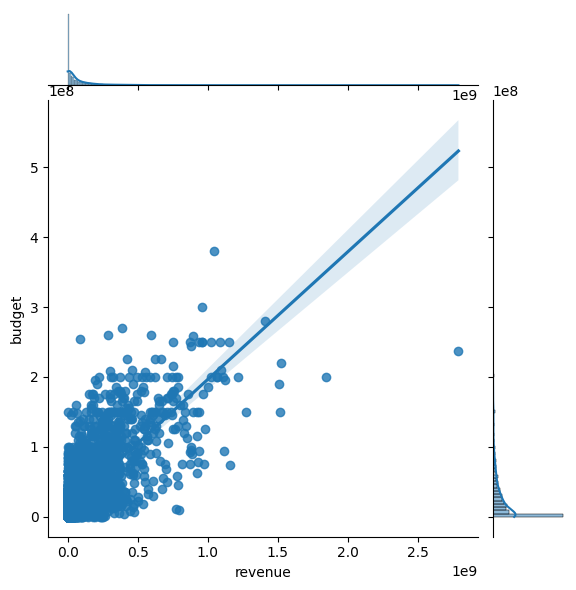

Correlacion entre recaudacion y presupuesto :  0.7305426604658354


C:\Users\faust\AppData\Local\Temp\ipykernel_28572\2514179745.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = dataClean.corr()


In [13]:
fig2 = sns.jointplot(x = "revenue", y = "budget", kind = "reg", data = dataClean)
fig1.fig.suptitle('correlacion entre recaudacion y presupuesto');
plt.show()
#Ver como achicar los puntos (queda desprolijo)
correlacion = dataClean.corr()
print("Correlacion entre recaudacion y presupuesto : ",correlacion.loc['revenue','budget'])

### Genero mas populares

[1156, 792, 425, 538, 697, 2299, 1275, 234, 514, 82, 1723, 895, 520, 348, 197, 144, 185, 109, 34, 8]
['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


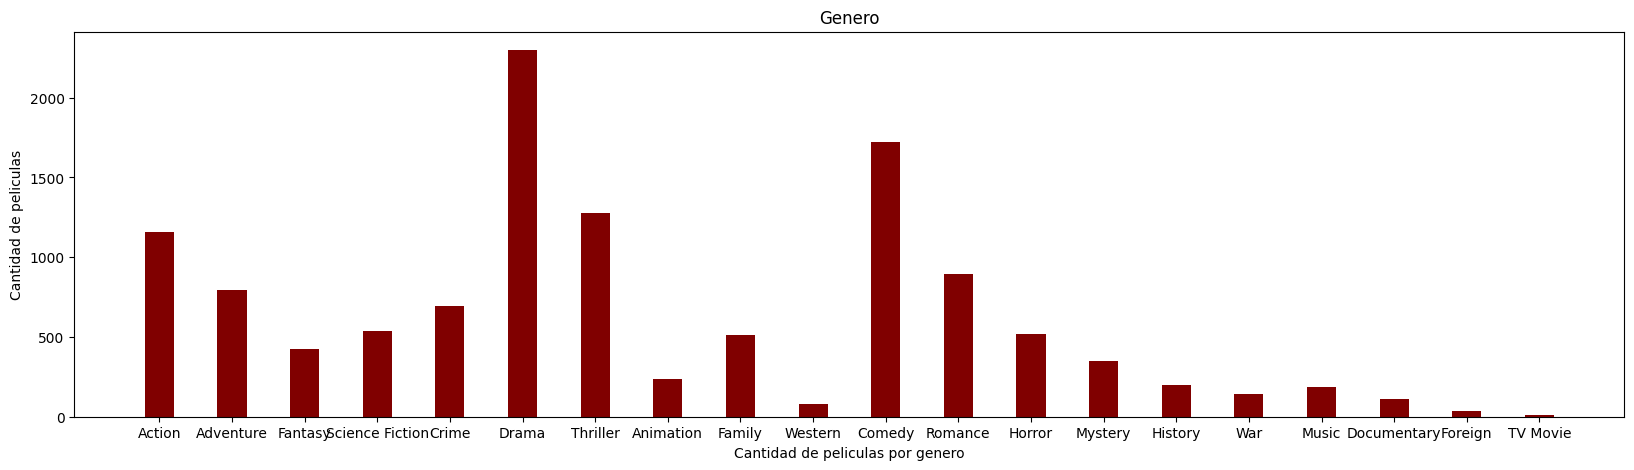

In [93]:
print(yMatriz(packMatriz(dataClean['genres'], 'name')))
print(xMatriz(packMatriz(dataClean['genres'], 'name')))
fig = plt.figure(figsize = (20, 5))
plt.bar(xMatriz(packMatriz(dataClean['genres'], 'name')), yMatriz(packMatriz(dataClean['genres'], 'name')), color ='maroon',
        width = 0.4)
plt.xlabel("Cantidad de peliculas por genero")
plt.ylabel("Cantidad de peliculas")
plt.title("Genero")
plt.show()

### Recaudacion por año

release_date
1916        8394751
1925       22000000
1927         650422
1929        4358000
1930        8000000
           ...     
2013    23474820496
2014    24120490589
2015    22775024221
2016    14461156948
2017              0
Name: revenue, Length: 90, dtype: int64


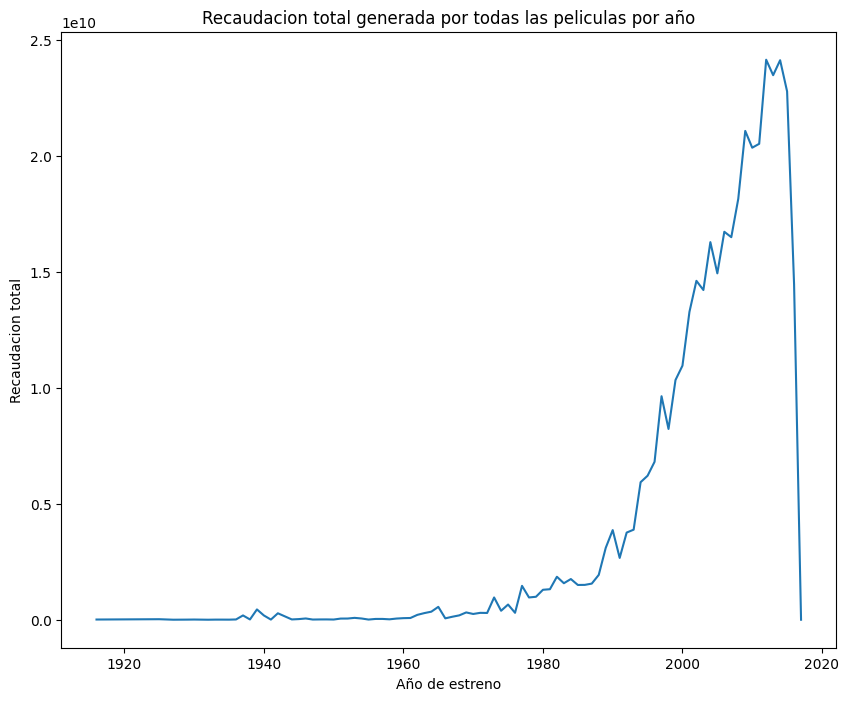

La industria del cine tuvo su maxima recaudacion en 2012 .


In [15]:

#paso a datetime object

revenue_peryear = dataClean.groupby(dataClean["release_date"].dt.year)['revenue'].sum()

print(revenue_peryear)
ax = revenue_peryear.plot(stacked=True, figsize=(10,8));
ax.set(xlabel='Año de estreno', ylabel='Recaudacion total', title = 'Recaudacion total generada por todas las peliculas por año')
plt.show()

max_revenue= revenue_peryear.idxmax()

print('La industria del cine tuvo su maxima recaudacion en', max_revenue,'.')

### Companias de produccion TOP

In [26]:
# tambien es object 'Production companies', hay q resolver el error

TOP_COMPANIAS = 15
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Counts', y='Value', data=dataClean['Production_companies'][:TOP_COMPANIAS], palette='Spectral')
ax.set_title(label='Distribucion de las top {} companias'.format(TOP_COMPANIAS))
ax.set_ylabel('')
ax.set_xlabel('Cantidad de peliculas')
plt.show()

KeyError: 'Production_companies'

<Figure size 1600x800 with 0 Axes>

### Promedio rating de peliculas por año de estreno


<AxesSubplot: xlabel='release_date'>

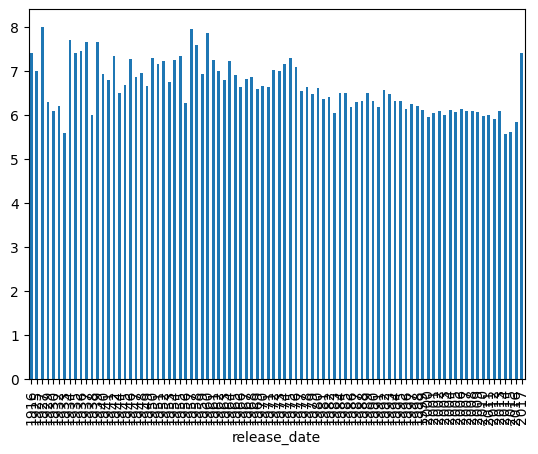

In [36]:
rating_peryear = dataClean.groupby(dataClean["release_date"].dt.year)['vote_average'].mean()

rating_peryear.plot(x='Año de estreno', kind='bar')

release_date
1916    7.400000
1925    7.000000
1927    8.000000
1929    6.300000
1930    6.100000
          ...   
2013    6.088793
2014    5.578992
2015    5.612150
2016    5.833654
2017    7.400000
Name: vote_average, Length: 90, dtype: float64


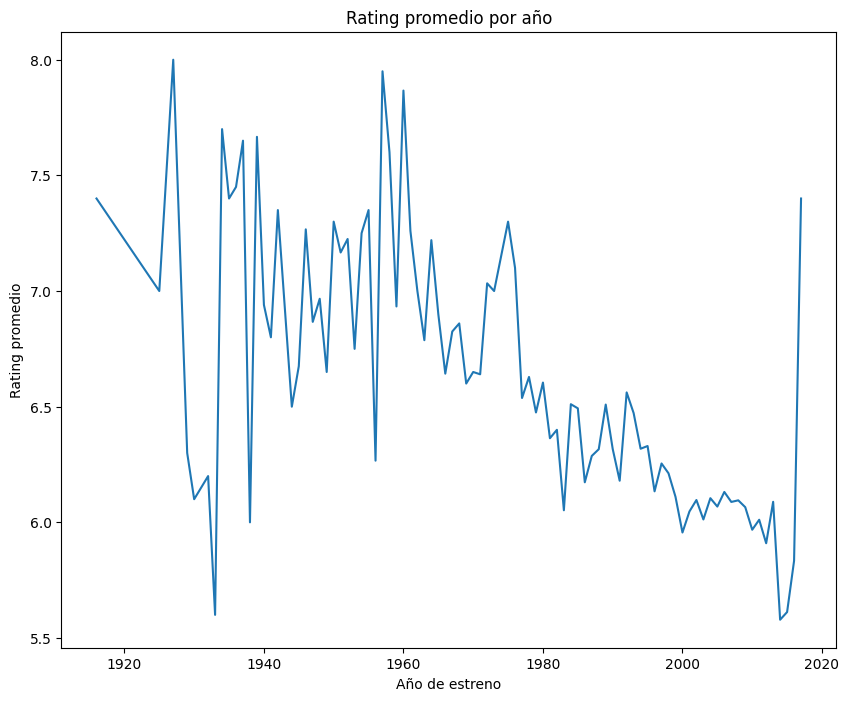

In [43]:
rating_peryear = dataClean.groupby(dataClean["release_date"].dt.year)['vote_average'].mean()

print(rating_peryear)
ax = rating_peryear.plot(stacked=True, figsize=(10,8))
ax.set(xlabel='Año de estreno', ylabel='Rating promedio', title = 'Rating promedio por año')
plt.show()

ANEXO

In [16]:
# es string?
test_string = data['genres'][0]
res1 = isinstance(test_string, str)
print("Is variable a string ? : " + str(res1))
#paso el string a diccionarios
print(data['genres'][0])
test_str = data['genres'][0]
res = list(eval(test_str))
print("Converted list of dictionaries : " + str(res))
#me fijo si funciona
print(res[0]['name'])

Is variable a string ? : False
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]


TypeError: eval() arg 1 must be a string, bytes or code object